In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
NUM_THREADS = 15
THREAD_INCR = 3
REQUESTS_PER_THREAD = 3000

df = pd.read_csv("../results/test-2022-03-17-18-40-15.csv", sep=",", engine="python", skiprows=1)
df_raw = df.copy()
df

,Threads,ThreadID,RequestID,Duration (nanosec)
0,9,3,40,14918408540
1,15,9,28,14801192257
2,6,6,5,15342555490
3,15,14,17,14730285089
4,12,10,25,14936251873
...,...,...,...,...
134995,6,5,2996,217522066
134996,12,1,2992,136995646
134997,12,11,3000,174359133
134998,12,1,2999,98916824


In [3]:
for col in ["Threads", "ThreadID", "RequestID"]:
    df[col] = df[col].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135000 entries, 0 to 134999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Threads             135000 non-null  int64
 1   ThreadID            135000 non-null  int64
 2   RequestID           135000 non-null  int64
 3   Duration (nanosec)  135000 non-null  int64
dtypes: int64(4)
memory usage: 4.1 MB


In [4]:
df.sort_values(by=["Threads", "ThreadID", "RequestID"], inplace=True)
df

,Threads,ThreadID,RequestID,Duration (nanosec)
714,3,1,1,17098773118
1060,3,1,2,17442348123
228,3,1,3,16210622950
517,3,1,4,16378497225
1322,3,1,5,17477296064
...,...,...,...,...
134487,15,15,2996,1138932362
134638,15,15,2997,1142228050
134746,15,15,2998,1159473912
134464,15,15,2999,1060758240


In [5]:
df[df["Threads"] == 3].groupby(["Threads", "ThreadID"], as_index=False)["Duration (nanosec)"].mean()

,Threads,ThreadID,Duration (nanosec)
0,3,1,1.968366e+09
1,3,2,1.972938e+09
2,3,3,1.968031e+09


In [6]:
# Get mean response time for each thread
df = df.groupby(["Threads", "ThreadID"], as_index=False)["Duration (nanosec)"].mean()
df

,Threads,ThreadID,Duration (nanosec)
0,3,1,1.968366e+09
1,3,2,1.972938e+09
2,3,3,1.968031e+09
3,6,1,1.969575e+09
4,6,2,1.971588e+09
5,6,3,1.975253e+09
6,6,4,1.966579e+09
7,6,5,1.976150e+09
8,6,6,1.962701e+09
9,9,1,1.973549e+09


In [7]:
# Get total response time for all threads for a given total number of threads
df = df.groupby("Threads", as_index=False)["Duration (nanosec)"].sum()
df

,Threads,Duration (nanosec)
0,3,5.909335e+09
1,6,1.182185e+10
2,9,1.772050e+10
3,12,2.363805e+10
4,15,2.949960e+10


In [8]:
df.columns = ["Threads", "Duration"]
df["Duration"] = df["Duration"].apply(lambda row: row * 1e-6)
df

,Threads,Duration
0,3,5909.334916
1,6,11821.847233
2,9,17720.495297
3,12,23638.048470
4,15,29499.599499


In [9]:
def plot_line(args): 
    x, y = args["x"], args["y"]
    plt.figure(figsize=args["size"][:2])
    plt.plot(x, y, data=args["df"], color=args["color"], marker=args["marker"])
    
    if "x_line_val" in args:
        plt.axvline(x=args["x_line_val"], color="black", linestyle="--")
    if "y_line_val" in args:
        plt.axhline(y=args["y_line_val"], color="black", linestyle="--")
    
    plt.title(args["title"], fontsize=args["size"][2])
    plt.xlabel(f'{x} ({args["xunit"]})', fontsize=args["size"][3])
    plt.ylabel(f'{y} ({args["yunit"]})', fontsize=args["size"][3])
    plt.show()

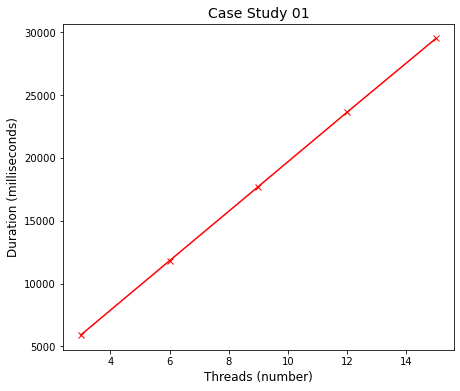

In [10]:
plot_line({
    "title": "Case Study 01",
    "x": "Threads",
    "y": "Duration",
    "df": df,
    "xunit": "number",
    "yunit": "milliseconds",
    "color": "red",
    "marker": "x",
    "size": [7, 6, 14, 12]
})